# Crime Data - Clustering

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch

In [2]:
#import dataset
crime_data = pd.read_csv("crime_data.csv", )
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
#Name the first column as state
crime_data = crime_data.rename(columns={"Unnamed: 0":"States"})

In [4]:
#Converting varibales to z-score scale
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
array = scale.fit_transform(crime_data.iloc[:,1:])

## KMenas Clustering

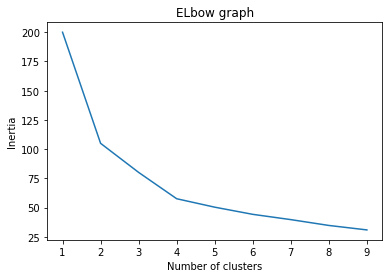

In [5]:
#find optimal k number of clustring
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=500)
    kmeans.fit_predict(array)
    wcss.append(kmeans.inertia_)
    
#Elbow graph
plt.plot(range(1,10), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("ELbow graph")
plt.show()

### From the above elbow graph we can see that optimal number of clusters is 4

In [6]:
#Cluster model
kmeans = KMeans(n_clusters=4, random_state=0, max_iter=500)

In [7]:
#Create cluster
y_kc = kmeans.fit_predict(array)

#Adding cluster column to the dataframe
cluster_km = pd.DataFrame(y_kc, columns=["Clusters"])
crime_data_km = pd.concat([crime_data,cluster_km],axis=1)

### EDA on created clusters

In [8]:
#data in each clusters
crime_data_km["Clusters"].value_counts()

2    16
3    13
1    13
0     8
Name: Clusters, dtype: int64

In [9]:
#Descriptive statistics of cluster 0
crime_data_km[crime_data_km["Clusters"] == 0].describe()

,Murder,Assault,UrbanPop,Rape,Clusters
count,8.000000,8.0000,8.000000,8.000000,8.0
mean,13.937500,243.6250,53.750000,21.412500,0.0
std,2.601614,49.7535,8.048957,3.811425,0.0
min,8.800000,188.0000,44.000000,16.100000,0.0
25%,13.150000,205.7500,47.250000,18.900000,0.0
50%,13.800000,242.5000,54.000000,21.700000,0.0
75%,15.575000,264.0000,59.250000,23.325000,0.0
max,17.400000,337.0000,66.000000,26.900000,0.0


In [10]:
#Descriptive statistics of cluster 1
crime_data_km[crime_data_km["Clusters"] == 1].describe()

,Murder,Assault,UrbanPop,Rape,Clusters
count,13.000000,13.000000,13.00000,13.000000,13.0
mean,10.815385,257.384615,76.00000,33.192308,1.0
std,2.083605,43.559420,10.77033,7.282337,0.0
min,7.900000,178.000000,48.00000,24.000000,1.0
25%,9.000000,249.000000,70.00000,27.800000,1.0
50%,11.100000,255.000000,80.00000,31.900000,1.0
75%,12.100000,285.000000,81.00000,38.700000,1.0
max,15.400000,335.000000,91.00000,46.000000,1.0


In [11]:
#Descriptive statistics of cluster 2
crime_data_km[crime_data_km["Clusters"] == 2].describe()

,Murder,Assault,UrbanPop,Rape,Clusters
count,16.000000,16.000000,16.000000,16.000000,16.0
mean,5.656250,138.875000,73.875000,18.781250,2.0
std,1.647207,41.175842,8.935883,5.236439,0.0
min,3.200000,46.000000,60.000000,8.300000,2.0
25%,4.300000,114.500000,66.750000,15.750000,2.0
50%,5.950000,147.000000,72.500000,19.400000,2.0
75%,6.900000,159.000000,80.750000,21.100000,2.0
max,8.500000,238.000000,89.000000,29.300000,2.0


In [12]:
#Descriptive statistics of cluster 3
crime_data_km[crime_data_km["Clusters"] == 3].describe()

,Murder,Assault,UrbanPop,Rape,Clusters
count,13.000000,13.000000,13.000000,13.000000,13.0
mean,3.600000,78.538462,52.076923,12.176923,3.0
std,2.362555,25.708674,10.086803,3.258618,0.0
min,0.800000,45.000000,32.000000,7.300000,3.0
25%,2.200000,56.000000,45.000000,9.500000,3.0
50%,2.600000,81.000000,53.000000,11.300000,3.0
75%,4.300000,102.000000,57.000000,14.900000,3.0
max,9.700000,120.000000,66.000000,16.500000,3.0


### From the above 4 cluster descriptive statistics, we can see the different avarage crime rates for examples average murder rate of clusters are as follows: C0 - 14, C1 -  11, C3 -  5.6, C4 - 3.6

## Hierarchical Clustering

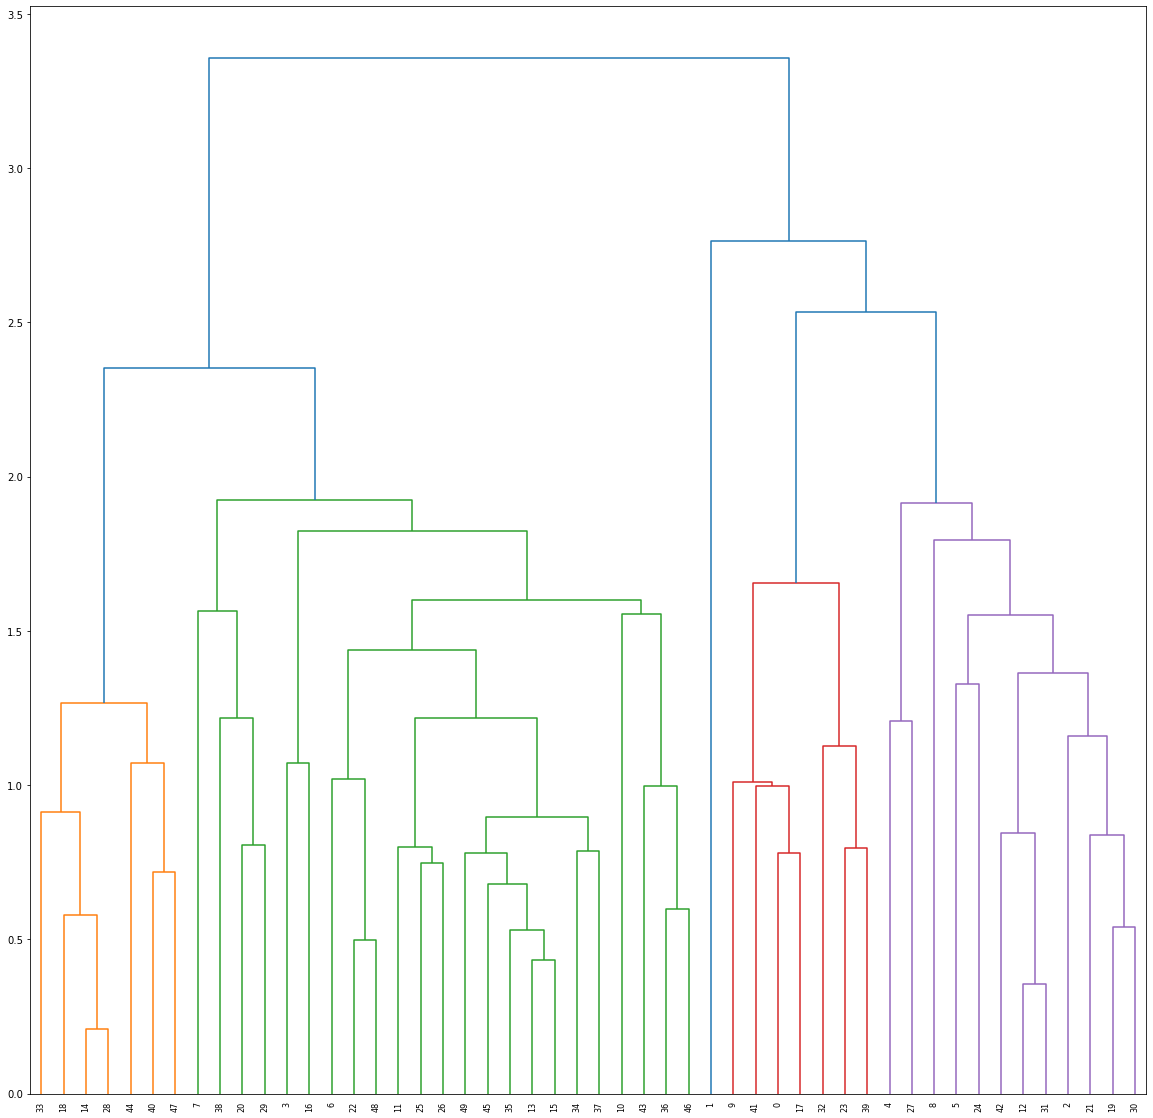

In [13]:
#Dendrogram
plt.figure(figsize=(20,20))
dendrogram = sch.dendrogram(sch.linkage(array,method="average"))

In [14]:
#Cluster model
hc = AgglomerativeClustering(n_clusters=4,linkage="average")

In [15]:
#Create clusters
y_hc = hc.fit_predict(array)

#Adding cluster column to the dataframe
cluster_hc = pd.DataFrame(y_hc, columns=["Clusters"])
crime_data_hc = pd.concat([crime_data,cluster_hc],axis=1)

### EDA on created clusters

In [16]:
#Data in each cluster
crime_data_hc["Clusters"].value_counts()

0    30
1    12
3     7
2     1
Name: Clusters, dtype: int64

In [17]:
#Descriptive statistics of cluster 0
crime_data_hc[crime_data_hc["Clusters"] == 0].describe()

,Murder,Assault,UrbanPop,Rape,Clusters
count,30.000000,30.000000,30.000000,30.000000,30.0
mean,4.870000,114.433333,63.633333,15.943333,0.0
std,2.304291,47.481890,14.406616,5.460370,0.0
min,0.800000,45.000000,32.000000,7.300000,0.0
25%,2.825000,81.500000,53.250000,11.225000,0.0
50%,4.650000,111.500000,65.500000,16.050000,0.0
75%,6.525000,150.500000,72.750000,19.875000,0.0
max,9.700000,238.000000,89.000000,29.300000,0.0


In [18]:
#Descriptive statistics of cluster 1
crime_data_hc[crime_data_hc["Clusters"] == 1].describe()

,Murder,Assault,UrbanPop,Rape,Clusters
count,12.000000,12.000000,12.000000,12.000000,12.0
mean,10.883333,256.916667,78.333333,32.250000,1.0
std,2.161158,45.462189,7.023769,6.727623,0.0
min,7.900000,178.000000,67.000000,24.000000,1.0
25%,9.000000,237.750000,73.000000,27.375000,1.0
50%,11.200000,254.500000,80.000000,31.450000,1.0
75%,12.125000,287.250000,81.500000,36.000000,1.0
max,15.400000,335.000000,91.000000,46.000000,1.0


In [19]:
#Descriptive statistics of cluster 2
crime_data_hc[crime_data_hc["Clusters"] == 2].describe()

,Murder,Assault,UrbanPop,Rape,Clusters
count,1.0,1.0,1.0,1.0,1.0
mean,10.0,263.0,48.0,44.5,2.0
std,NaN,NaN,NaN,NaN,NaN
min,10.0,263.0,48.0,44.5,2.0
25%,10.0,263.0,48.0,44.5,2.0
50%,10.0,263.0,48.0,44.5,2.0
75%,10.0,263.0,48.0,44.5,2.0
max,10.0,263.0,48.0,44.5,2.0


In [20]:
#Descriptive statistics of cluster 3
crime_data_hc[crime_data_hc["Clusters"] == 3].describe()

,Murder,Assault,UrbanPop,Rape,Clusters
count,7.000000,7.000000,7.000000,7.000000,7.0
mean,14.671429,251.285714,54.285714,21.685714,3.0
std,1.693826,48.376007,8.538429,4.031306,0.0
min,13.000000,188.000000,44.000000,16.100000,3.0
25%,13.200000,223.500000,46.500000,19.150000,3.0
50%,14.400000,249.000000,58.000000,22.200000,3.0
75%,15.750000,269.000000,59.500000,24.150000,3.0
max,17.400000,337.000000,66.000000,26.900000,3.0


### From the above 4 cluster descriptive statistics, we can see the different avarage crime rates for examples average murder rate of clusters are as follows: C0 - 5, C1 - 11, C3 - 10, C4 - 14

## DBSCAN 

In [21]:
#Cluster model
dbscan = DBSCAN(eps=0.8, min_samples=5)

In [22]:
#Create clusters
y_dc = dbscan.fit_predict(array)

#Adding cluster column to the dataframe
cluster_dc = pd.DataFrame(y_dc, columns=["Clusters"])
crime_data_dc = pd.concat([crime_data,cluster_dc],axis=1)

### EDA on created clusters

In [23]:
#Data in each cluster
crime_data_dc["Clusters"].value_counts()

-1    33
 0    11
 1     6
Name: Clusters, dtype: int64

In [24]:
#Descriptive statistics of cluster -1
crime_data_dc[crime_data_dc["Clusters"] == -1].describe()

,Murder,Assault,UrbanPop,Rape,Clusters
count,33.000000,33.000000,33.000000,33.00000,33.0
mean,9.439394,207.060606,68.303030,24.50000,-1.0
std,4.238657,77.329627,16.080821,9.57885,0.0
min,2.200000,46.000000,32.000000,8.30000,-1.0
25%,5.700000,159.000000,58.000000,17.10000,-1.0
50%,9.700000,211.000000,72.000000,24.00000,-1.0
75%,12.700000,259.000000,80.000000,29.30000,-1.0
max,17.400000,337.000000,91.000000,46.00000,-1.0


In [25]:
#Descriptive statistics of cluster 0
crime_data_dc[crime_data_dc["Clusters"] == 0].describe()

,Murder,Assault,UrbanPop,Rape,Clusters
count,11.000000,11.000000,11.000000,11.000000,11.0
mean,5.845455,120.454545,64.000000,17.600000,0.0
std,1.885398,26.371817,6.723095,2.726169,0.0
min,2.600000,72.000000,53.000000,14.200000,0.0
25%,5.150000,107.500000,61.000000,15.250000,0.0
50%,6.300000,115.000000,65.000000,16.500000,0.0
75%,7.000000,135.500000,67.000000,20.350000,0.0
max,8.500000,161.000000,75.000000,21.400000,0.0


In [26]:
#Descriptive statistics of cluster 1
crime_data_dc[crime_data_dc["Clusters"] == 1].describe()

,Murder,Assault,UrbanPop,Rape,Clusters
count,6.000000,6.000000,6.000000,6.000000,6.0
mean,2.266667,63.333333,53.166667,9.916667,1.0
std,0.966782,16.954842,8.280499,2.121713,0.0
min,0.800000,45.000000,44.000000,7.300000,1.0
25%,2.100000,53.750000,46.500000,8.225000,1.0
50%,2.150000,56.500000,53.500000,10.150000,1.0
75%,2.500000,76.500000,56.750000,11.175000,1.0
max,3.800000,86.000000,66.000000,12.800000,1.0


### From the above 3 cluster descriptive statistics, we can see the different avarage crime rates for examples average murder rate of clusters are as follows: C(-1) - C(0), C(1) - 6, C3 - 2